# Workin With Matplotlib Library

#### Load Necessary Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#### The Basics

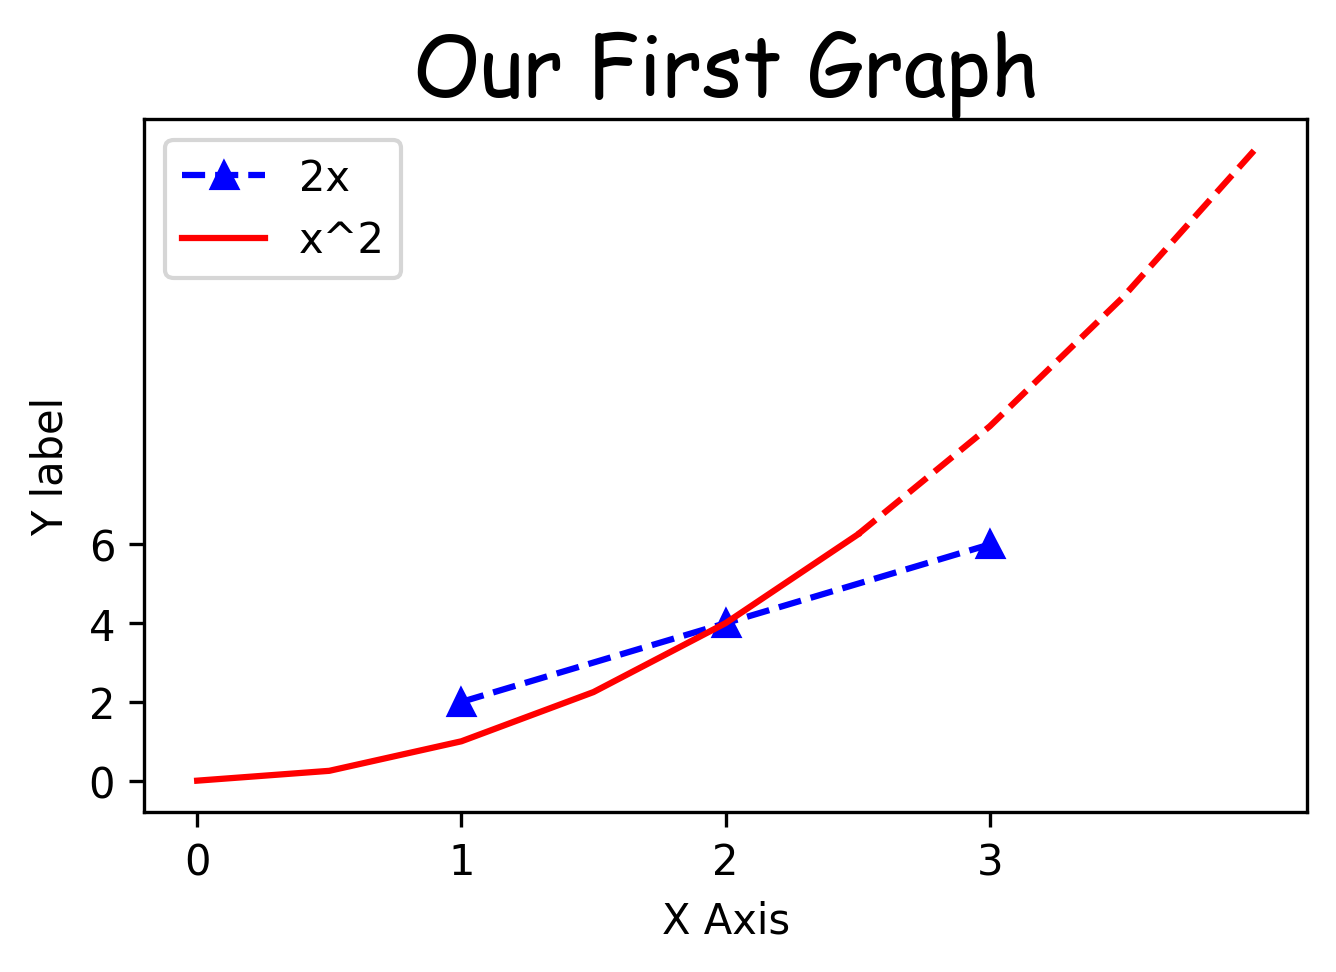

In [10]:
x = [1,2,3]
y = [2,4,6]

## Resizing the Graph
plt.figure(figsize=(5,3), dpi=300)  # dpi stands for pixel


plt.plot(x, y, 'b^--', label='2x')

## Line Number Two

### Selecting interval for the plotting
x2 = np.arange(0, 4.5, 0.5)
### Plotting interval in partitioned form
plt.plot(x2[:6], x2[:6]**2, 'r', label='x^2')
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title to the plot(specify font parameters with fontdictss)
plt.title('Our First Graph', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('X Axis')
plt.ylabel('Y label')

plt.xticks([0,1,2,3])
plt.yticks([0,2,4,6])

plt.legend()

## Saving the Graph
# plt.save('mygraph.png', dpi=100)

plt.show()

#### Bar Chart

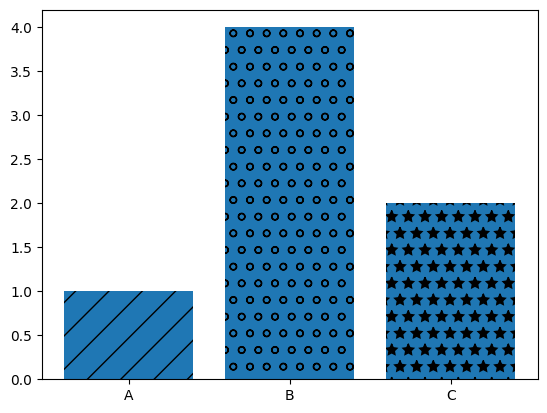

In [14]:
labels = ['A', 'B', 'C']
values = [1,4,2]

bars = plt.bar(labels, values)
'''
bars[0].set_hatch('/')
bars[1].set_hatch('*')
bars[2].set_hatch('o')
'''
# Alternative to the commented block of code
patterns = ['/', 'o', '*']

for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.show()

#### Real World Examples

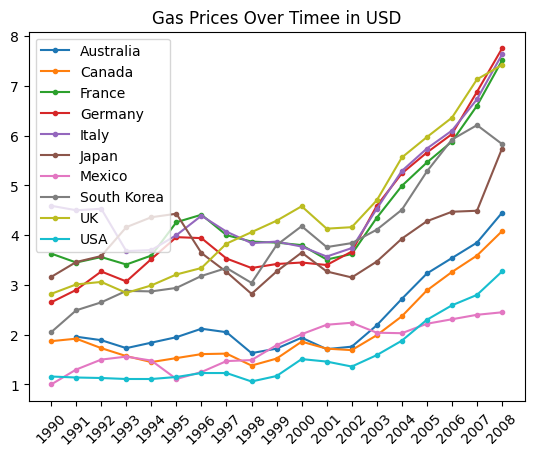

In [45]:
# Loading data into notebook
gas = pd.read_csv('gas_prices.csv')

''' 
plt.plot(gas['Year'], gas.Australia,'r*-', linewidth=2.3, label='Australia')
plt.plot(gas['Year'], gas.USA,'b*-', linewidth=2.3, label='USA')
plt.plot(gas.Year, gas['South Korea'], 'g*-', linewidth=2.3, label='South Korea')
'''
## More Efficient way of plotting all the datas

for country in gas:
    if country != 'Year':
        plt.plot(gas.Year, gas[country], marker='.')

plt.title('Gas Prices Over Timee in USD')

plt.xticks(gas.Year, rotation = 45)
empty = []
headers = gas.columns
for i in headers:
    if i != 'Year':
        empty.append(i)


plt.legend(empty)

plt.show()

#### Histogram

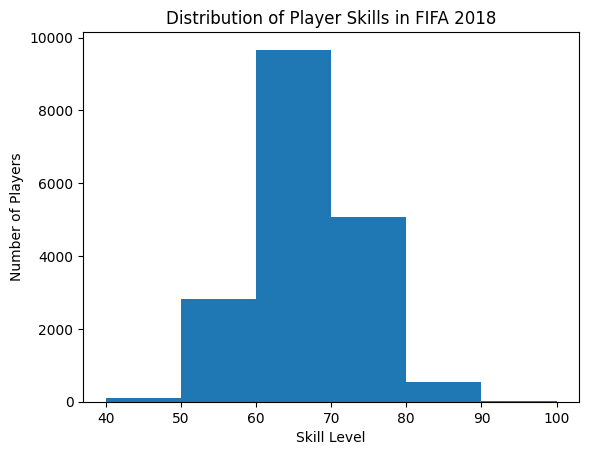

In [53]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head()

plt.hist(fifa.Overall, bins=[40,50,60,70,80,90,100])

plt.xticks([40,50,60,70,80,90,100])
plt.ylabel("Number of Players")
plt.xlabel("Skill Level")
plt.title('Distribution of Player Skills in FIFA 2018')

plt.show()

#### Pie Chart

C:\Users\johny\AppData\Local\Temp\ipykernel_13684\2119379658.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
C:\Users\johny\AppData\Local\Temp\ipykernel_13684\2119379658.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]


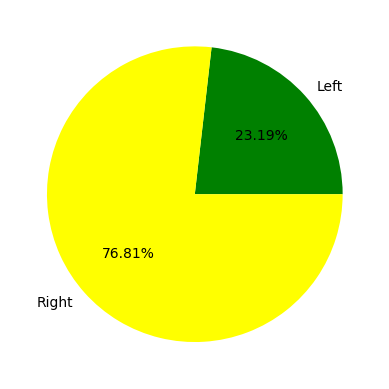

In [62]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['green', 'yellow']
plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f%%')

plt.show()

C:\Users\johny\AppData\Local\Temp\ipykernel_13684\1001221472.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light = fifa.loc[fifa.Weight < 125].count()[0]
C:\Users\johny\AppData\Local\Temp\ipykernel_13684\1001221472.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
C:\Users\johny\AppData\Local\Temp\ipykernel_13684\1001221472.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by pos

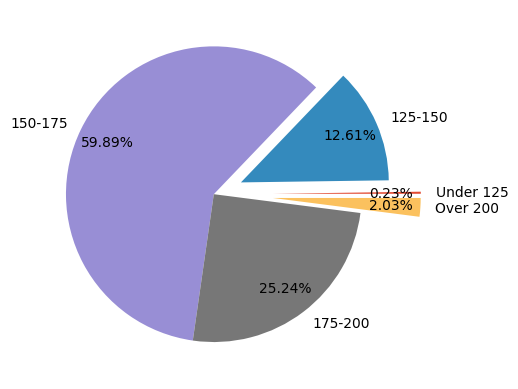

In [71]:
fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 200)].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
### Use the plot.style to customize the colorscheme of the plot
plt.style.use('ggplot')
## Explode breaks the graph apart a little bit
explode = (.4, .2, 0, 0, .4)
plt.pie(weights, labels=labels, autopct='%.2f%%', pctdistance=0.8, explode=explode)

plt.show()


#### Box Plot

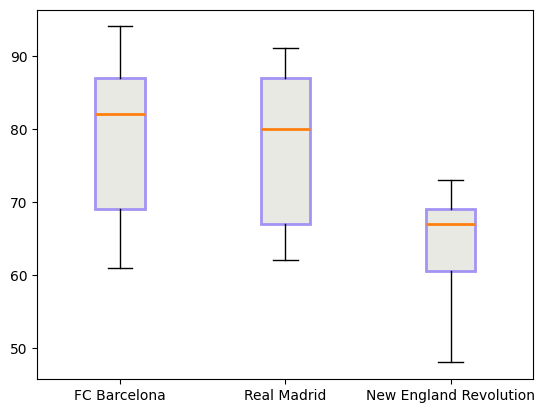

In [82]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
new_england = fifa.loc[fifa.Club == 'New England Revolution']['Overall']
plt.style.use('default')
labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

boxes = plt.boxplot([barcelona, madrid, new_england], labels=labels, patch_artist=True, medianprops={'linewidth':2})
for box in boxes['boxes']:
    # Set edge color
    box.set(color='#A294f4', linewidth=2)

    # Change Fill Color
    box.set(facecolor='#e8e9e2')


plt.show()